In [1]:
import pandas as pd 
import numpy as np

avocado_base = pd.read_csv("C:/Users/mehrp/OneDrive/Documents/GitHub/lab_2_Mehrpad_M_Moattari/avocado-updated-2020.csv")

1. 
    
    Columns: 

date: The date of the observation.

average_price: The average price of a single avocado.

total_volume: Total number of avocados sold.

4046, 4225, 4770: These columns represent the total number of avocados sold with their respective PLU codes.

total_bags, small_bags, large_bags, xlarge_bags: These columns likely represent the total number of avocados sold in bags of various sizes.

type: The type of avocado, either "conventional" or "organic".

year: The year of the observation.

geography: The city or region of the observation.

    Here's a summary of the dataset:

There are a total of 33,045 observations in the dataset.

All columns have no missing values.

The dataset spans from the year 2015 to 2020.

There are two unique types of avocados: "conventional" and "organic".

The dataset covers 54 unique geographical locations.

The average price of avocados over this period is approximately $1.38, with a minimum price of $0.44 and a maximum of $3.25.

In [2]:
#unique values in geogprahy column
unique_geographies = avocado_base['geography'].unique()

unique_geographies

array(['Albany', 'Atlanta', 'Baltimore/Washington', 'Boise', 'Boston',
       'Buffalo/Rochester', 'California', 'Charlotte', 'Chicago',
       'Cincinnati/Dayton', 'Columbus', 'Dallas/Ft. Worth', 'Denver',
       'Detroit', 'Grand Rapids', 'Great Lakes', 'Harrisburg/Scranton',
       'Hartford/Springfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'Las Vegas', 'Los Angeles', 'Louisville', 'Miami/Ft. Lauderdale',
       'Midsouth', 'Nashville', 'New Orleans/Mobile', 'New York',
       'Northeast', 'Northern New England', 'Orlando', 'Philadelphia',
       'Phoenix/Tucson', 'Pittsburgh', 'Plains', 'Portland',
       'Raleigh/Greensboro', 'Richmond/Norfolk', 'Roanoke', 'Sacramento',
       'San Diego', 'San Francisco', 'Seattle', 'South Carolina',
       'South Central', 'Southeast', 'Spokane', 'St. Louis', 'Syracuse',
       'Tampa', 'Total U.S.', 'West', 'West Tex/New Mexico'], dtype=object)

In [3]:
#categorizing geo regions

major_regions = ['Total U.S.', 'West', 'Great Lakes', 'Midsouth', 'Northeast', 'Plains', 'Southeast', 'South Central']
states_regions = ['California', 'South Carolina', 'Northern New England']

#new column 'geo_type' based on the categories
avocado_base['geo_type'] = avocado_base['geography'].apply(lambda x: 'Major Region' if x in major_regions else 
        ('State/Region' if x in states_regions else 'Metro/City'))


avocado_base.head()


,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,geo_type
0,1/4/2015,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany,Metro/City
1,1/4/2015,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany,Metro/City
2,1/4/2015,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta,Metro/City
3,1/4/2015,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,2015,Atlanta,Metro/City
4,1/4/2015,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,Baltimore/Washington,Metro/City


In [4]:
#Rename the columns
avocado_base.rename(columns={'4046': 'small_avocado', '4225': 'medium_avocado', '4770': 'large_avocado'}, inplace=True)


avocado_base.head()


,date,average_price,total_volume,small_avocado,medium_avocado,large_avocado,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,geo_type
0,1/4/2015,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany,Metro/City
1,1/4/2015,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany,Metro/City
2,1/4/2015,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta,Metro/City
3,1/4/2015,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,2015,Atlanta,Metro/City
4,1/4/2015,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,Baltimore/Washington,Metro/City


In [5]:
#'date' column to a datetime format
avocado_base['date'] = pd.to_datetime(avocado_base['date'])

#month, day, and year from the 'date'
avocado_base['month'] = avocado_base['date'].dt.month
avocado_base['day'] = avocado_base['date'].dt.day
#already have a 'year' column

avocado_base.head()

,date,average_price,total_volume,small_avocado,medium_avocado,large_avocado,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,geo_type,month,day
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany,Metro/City,1,4
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany,Metro/City,1,4
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta,Metro/City,1,4
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,2015,Atlanta,Metro/City,1,4
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,Baltimore/Washington,Metro/City,1,4


3.Which major geographical region sold the most total organic, small Hass avocados in 2017?

In [6]:
#data for 2017
filtered_data_q3 = avocado_base[(avocado_base['year'] == 2017) & 
    (avocado_base['type'] == 'organic') & 
    (avocado_base['geo_type'] == 'Major Region')]

#sum the small avocado sales
grouped_data_q3 = filtered_data_q3.groupby('geography')['small_avocado'].sum()

#most small organic avocados in 2017
max_sales_region = grouped_data_q3.idxmax()
max_sales_value = grouped_data_q3.max()

(max_sales_region, max_sales_value)


('Total U.S.', 6882024.42)

4. In 2017, the major geographical region "Total U.S." sold the most total organic, small Hass avocados with a total volume of approximately 6,882,024.42 units.

Split the date variable into month, day, and year variables. In which month is the highest average volume of avocado sales?

In [7]:
#group by month and calculate the average total volume for each month
average_sales_per_month = avocado_base.groupby('month')['total_volume'].mean()

#highest average volume of avocado sales (month)
max_sales_month = average_sales_per_month.idxmax()
max_sales_avg_value = average_sales_per_month.max()

(max_sales_month, max_sales_avg_value)

(5, 1123632.254218107)

The month of May (represented as 5) has the highest average volume of avocado sales, with an average volume of approximately 1,123,632.25 units across all the years in the dataset.

5.Which metro area geographical regions sold the most total avocados? Plot side-by-side box-plots of the total volume for only the five metro geographical regions with the highest averages for the total_volume variable.

Added an additional plot for question #5. 


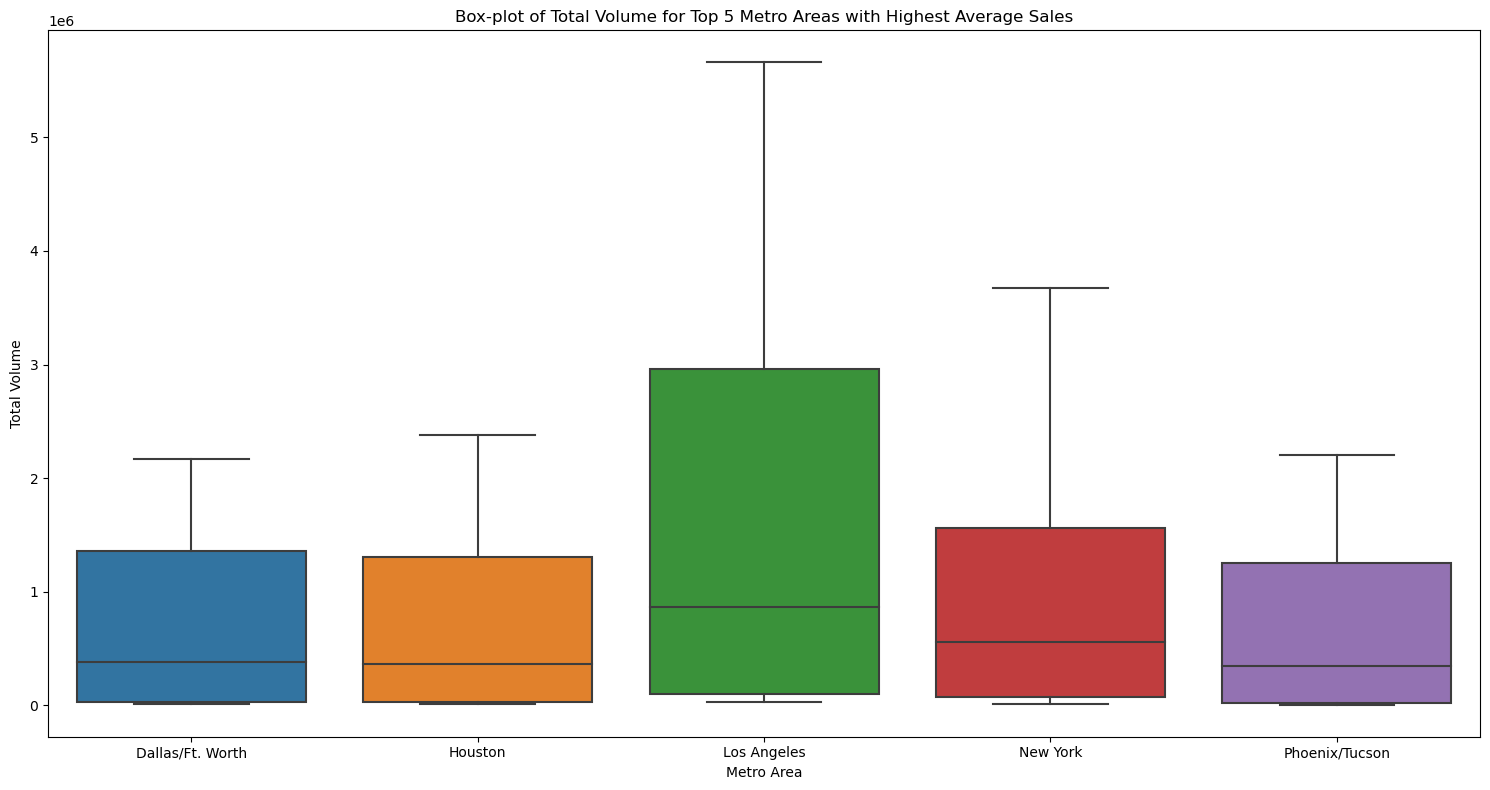

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

#Metro/City geo_type
metro_data = avocado_base[avocado_base['geo_type'] == 'Metro/City']

#average total
average_sales_per_metro = metro_data.groupby('geography')['total_volume'].mean()

#top 5 metro areas with highest average total
top5_metro_areas = average_sales_per_metro.nlargest(5).index

#top 5 metro areas
top5_metro_data = avocado_base[avocado_base['geography'].isin(top5_metro_areas)]


plt.figure(figsize=(15, 8))
sns.boxplot(data=top5_metro_data, x='geography', y='total_volume', showfliers=False) #excluding outliers
plt.title('Box-plot of Total Volume for Top 5 Metro Areas with Highest Average Sales')
plt.ylabel('Total Volume')
plt.xlabel('Metro Area')
plt.tight_layout()
plt.show()

As shown in the plot above, Los Angeles has the highest average among the top 5 metro regions. 

The following four California geographical regions are in this data set: "Los Angeles", "San Diego", "Sacramento", and "San Francisco".

6. From your cleaned data set, create a data set with only these California regions and answer the following questions about these California regions only.

In [9]:
#California regions
california_regions = ["Los Angeles", "San Diego", "Sacramento", "San Francisco"]
california_data = avocado_base[avocado_base['geography'].isin(california_regions)]

california_data.head()

,date,average_price,total_volume,small_avocado,medium_avocado,large_avocado,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,geo_type,month,day
44,2015-01-04,0.85,2682159.95,1837999.65,524430.47,64225.78,255504.05,215571.80,36981.72,2950.53,conventional,2015,Los Angeles,Metro/City,1,4
45,2015-01-04,1.25,54495.54,47721.51,1723.40,0.00,5050.63,5050.63,0.00,0.00,organic,2015,Los Angeles,Metro/City,1,4
80,2015-01-04,1.05,430138.88,110693.69,270107.61,9737.50,39600.08,39600.08,0.00,0.00,conventional,2015,Sacramento,Metro/City,1,4
81,2015-01-04,1.33,9213.49,3727.52,4327.52,0.00,1158.45,1158.45,0.00,0.00,organic,2015,Sacramento,Metro/City,1,4
82,2015-01-04,0.94,461607.33,244152.26,165299.33,15302.75,36852.99,30884.29,5595.00,373.70,conventional,2015,San Diego,Metro/City,1,4


7. In which California regions is the price of organic versus conventional avocados most different? Support your answer with a few summary statistics AND a visualization.

In [10]:
#the average price for each combo
avg_prices = california_data.groupby(['geography', 'type'])['average_price'].mean().unstack()

#the price difference between organic and conventional avocados for each region
avg_prices['price_difference'] = avg_prices['organic'] - avg_prices['conventional']

avg_prices


type,conventional,organic,price_difference
geography,,,
Los Angeles,1.047124,1.574902,0.527778
Sacramento,1.295359,1.873856,0.578497
San Diego,1.113856,1.798366,0.684510
San Francisco,1.400490,2.119444,0.718954


    Los Angeles:

Conventional: $1.05

Organic: $1.57

Price Difference: $0.53

    Sacramento:

Conventional: $1.30

Organic: $1.87

Price Difference: $0.58
    
    San Diego:

Conventional: $1.11

Organic: $1.80

Price Difference: $0.68
    
    San Francisco:

Conventional: $1.40

Organic: $2.12

Price Difference: $0.72

From the calculated values, we can see that the San Francisco region has the most significant price difference between organic and conventional avocados, with a difference of approximately $0.72.

Summary statistics AND a visualization part: 

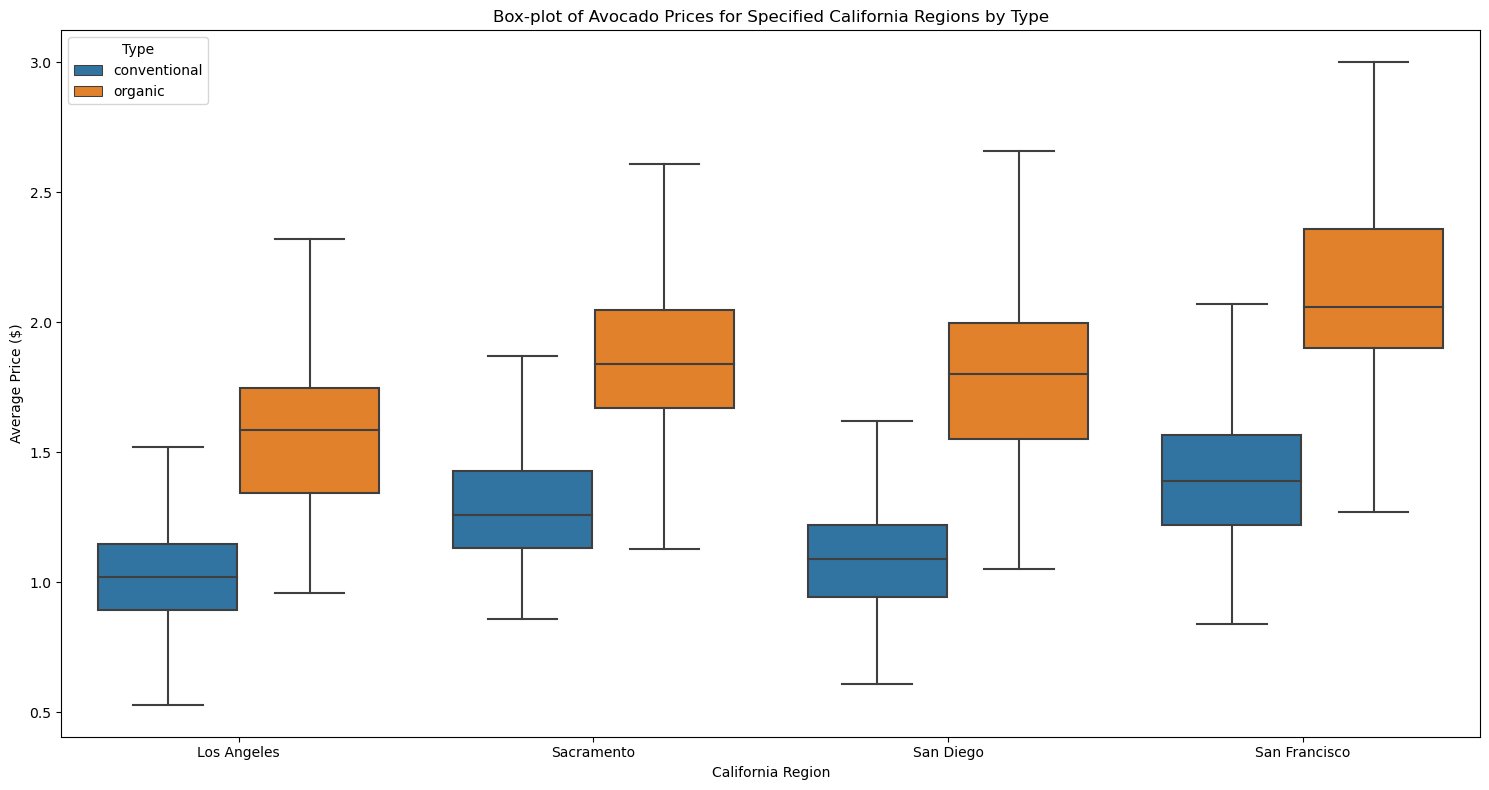

In [11]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=california_data, x='geography', y='average_price', hue='type', showfliers=False)
plt.title('Box-plot of Avocado Prices for Specified California Regions by Type')
plt.ylabel('Average Price ($)')
plt.xlabel('California Region')
plt.tight_layout()
plt.legend(title='Type')
plt.show()


The median price of organic avocados is consistently higher than that of conventional avocados across all regions.

San Francisco not only has the largest price difference between organic and conventional avocados, as indicated by our earlier calculations, but also has the highest overall prices for both organic and conventional avocados among the specified regions.

8- 


Data transformation: 

a- Calculating the average sales.

b- Reshaping the Data.

c- Undrestanding proportions. 

d- Plot for better undrestanding. 

In [12]:
california_data_renamed = california_data.rename(columns=
             {'small_avocado': 'S/M', 
             'medium_avocado': 'L', 
             'large_avocado': 'XL'})

#long Format by Adding Size Column for Avocados
cali_long = pd.melt(california_data_renamed, id_vars=['geography', 'type'], 
                    value_vars=['S/M', 'L', 'XL'], var_name='size', value_name='amount')

#the mean after grouping by City, Type, and Size
cali_long_average = cali_long.groupby(['geography', 'type', 'size']).mean()

# Convert back to regular DataFrame by resetting the index of the groupby output
cali_long_average_df = cali_long_average.reset_index()

cali_long_average_df


,geography,type,size,amount
0,Los Angeles,conventional,L,4.438423e+05
1,Los Angeles,conventional,S/M,1.172952e+06
2,Los Angeles,conventional,XL,9.707364e+04
3,Los Angeles,organic,L,2.080422e+04
4,Los Angeles,organic,S/M,1.444206e+04
5,Los Angeles,organic,XL,6.035294e+00
6,Sacramento,conventional,L,2.430051e+05
7,Sacramento,conventional,S/M,1.412831e+05
8,Sacramento,conventional,XL,6.333280e+03
9,Sacramento,organic,L,4.282693e+03


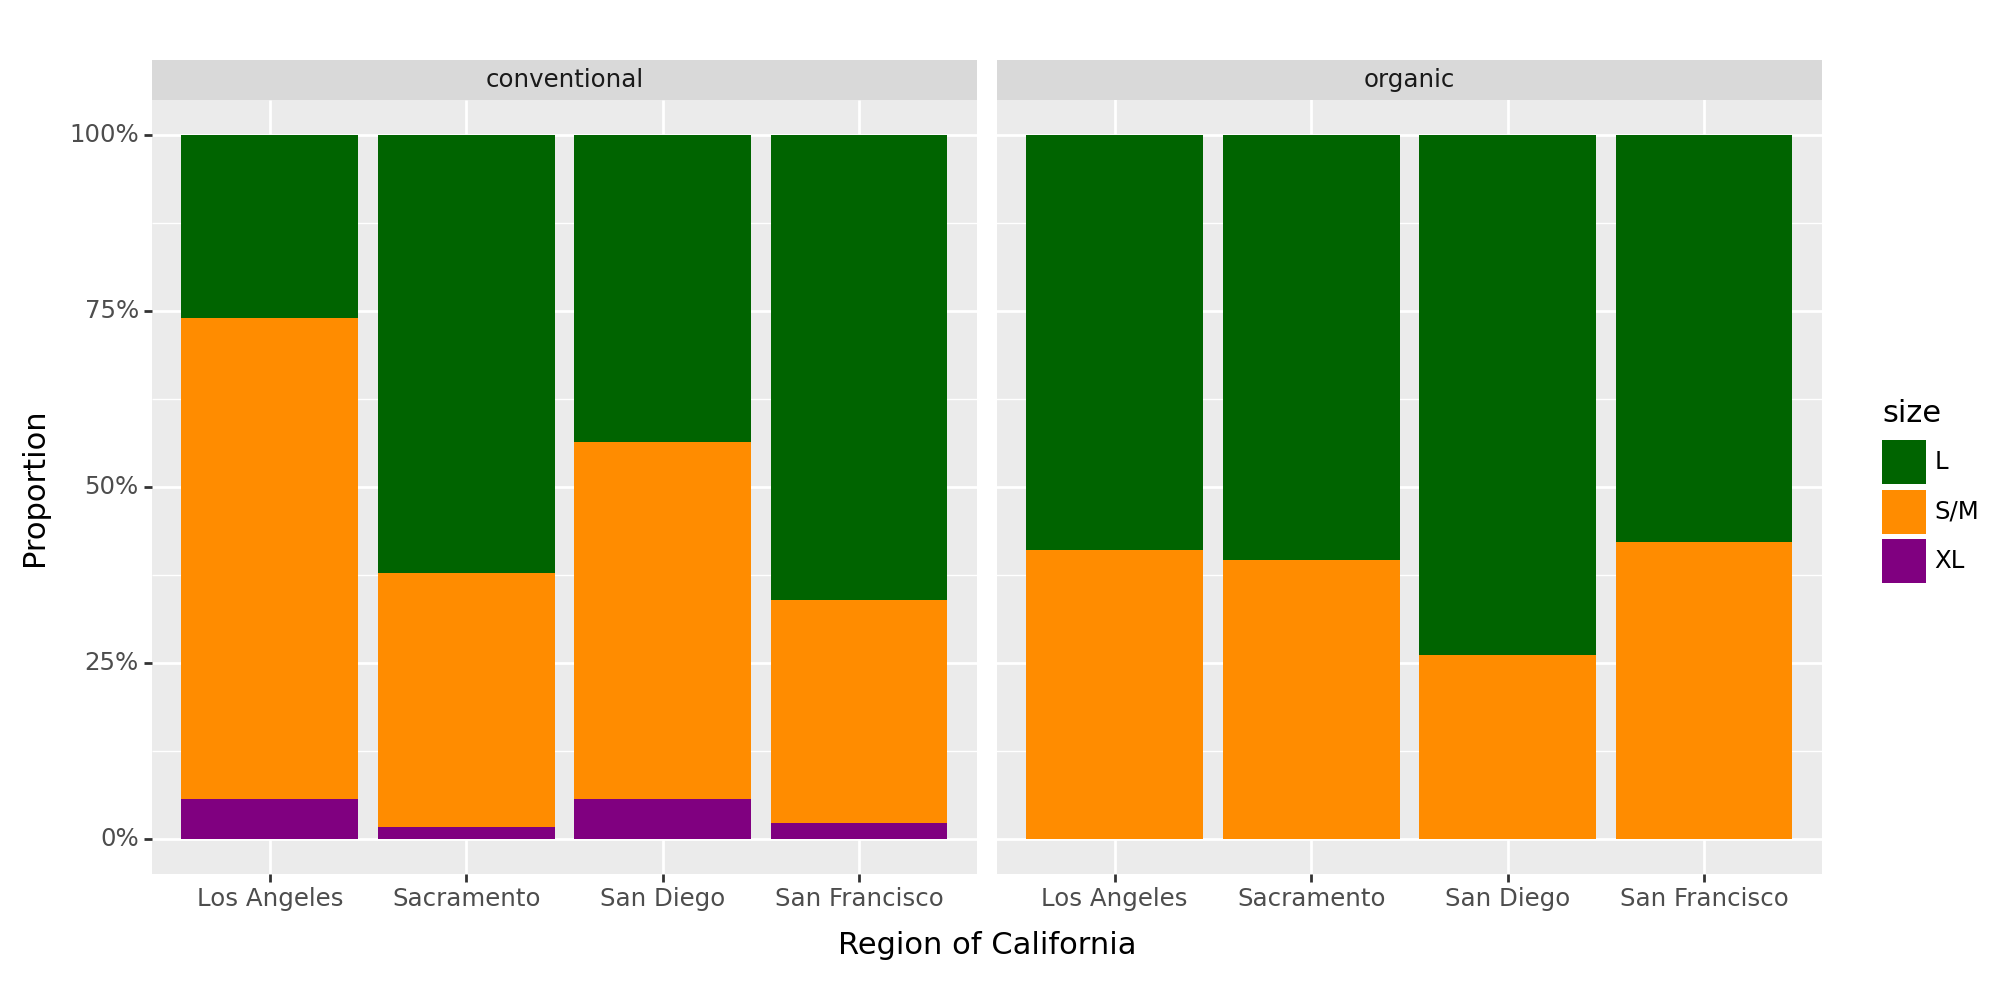

<Figure Size: (1000 x 500)>

In [13]:
from plotnine import ggplot, geom_col, aes, facet_wrap, theme, ylab, xlab, scale_y_continuous, scale_fill_manual

custom_colors = {
    'S/M': 'darkorange',
    'L': 'darkgreen',
    'XL': 'purple'
} 

plot = (
    
    ggplot(cali_long_average_df, aes(x = "geography", y = "amount", fill = "size")) 
    + geom_col(position="fill")
    + scale_y_continuous(labels=lambda l: ["{:.0%}".format(v) for v in l])
    + scale_fill_manual(values=custom_colors)
    + facet_wrap("type")  
    + theme(figure_size=(10,5))
    + ylab("Proportion")
    + xlab("Region of California")
)

plot

Using Outside Data

Find or make a data set with house prices for these four California regions. Join this data set with your California avocado data set.

Use your new joined data set to make an argument about the relationship between house prices and avocado prices/sales.

Support your argument with a plot.

In [14]:
california_housing = pd.read_csv("C:/Users/mehrp/OneDrive/Documents/GitHub/lab_2_Mehrpad_M_Moattari/2022_average_housing_dataset.csv")
california_housing

,City,Neighborhood,House_Type,Bedrooms,Bathrooms,Square_Feet,Year_Built,Price,Days_on_Market,Monthly_Mortgage
0,Sacramento,Natomas,Single Family,3,3.0,3692,2002,1754438.40,89,7878.212436
1,Sacramento,Natomas,Single Family,4,2.0,2285,1952,972724.50,16,4367.967694
2,Sacramento,Land Park,Condo,2,2.5,2924,1932,863164.80,72,3875.995681
3,Sacramento,East Sac,Single Family,4,1.0,1074,1958,463581.36,56,2081.687471
4,Sacramento,Land Park,Townhouse,3,2.5,1867,1963,741012.30,17,3327.476369
...,...,...,...,...,...,...,...,...,...,...
795,San Francisco,Nob Hill,Condo,2,1.5,3499,1911,2395555.36,18,10757.114088
796,San Francisco,Sunset District,Townhouse,1,1.0,2201,1929,1970775.40,17,8849.662242
797,San Francisco,Mission District,Single Family,1,2.5,2056,2015,2452931.36,76,11014.757968
798,San Francisco,Downtown,Single Family,4,3.0,3814,2021,4605710.12,66,20681.696630


In [15]:
#the mean of average housing prices for each city
mean_housing_prices = california_housing.groupby('City')['Price'].mean().reset_index()

mean_housing_prices.columns = ['geography', 'mean_housing_price']

#merge 
merged_data_housing = pd.merge(avocado_base, mean_housing_prices, on='geography', how='left')


merged_data_housing.head()

,date,average_price,total_volume,small_avocado,medium_avocado,large_avocado,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,geo_type,month,day,mean_housing_price
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany,Metro/City,1,4,NaN
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany,Metro/City,1,4,NaN
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta,Metro/City,1,4,NaN
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,2015,Atlanta,Metro/City,1,4,NaN
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,Baltimore/Washington,Metro/City,1,4,NaN


In [16]:
#the merged dataset for California data
california_merged_data = merged_data_housing[merged_data_housing['geography'].isin(california_regions)]


california_merged_data.head()




,date,average_price,total_volume,small_avocado,medium_avocado,large_avocado,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,geo_type,month,day,mean_housing_price
44,2015-01-04,0.85,2682159.95,1837999.65,524430.47,64225.78,255504.05,215571.80,36981.72,2950.53,conventional,2015,Los Angeles,Metro/City,1,4,1.517923e+06
45,2015-01-04,1.25,54495.54,47721.51,1723.40,0.00,5050.63,5050.63,0.00,0.00,organic,2015,Los Angeles,Metro/City,1,4,1.517923e+06
80,2015-01-04,1.05,430138.88,110693.69,270107.61,9737.50,39600.08,39600.08,0.00,0.00,conventional,2015,Sacramento,Metro/City,1,4,8.899973e+05
81,2015-01-04,1.33,9213.49,3727.52,4327.52,0.00,1158.45,1158.45,0.00,0.00,organic,2015,Sacramento,Metro/City,1,4,8.899973e+05
82,2015-01-04,0.94,461607.33,244152.26,165299.33,15302.75,36852.99,30884.29,5595.00,373.70,conventional,2015,San Diego,Metro/City,1,4,1.221984e+06


In [17]:
#filter for only organic type and group by the geography column to calculate the mean prices
organic_california_prices = california_merged_data[california_merged_data['type'] == 'organic'].groupby('geography').agg({
    'average_price': 'mean',
    'mean_housing_price': 'mean'
}).reset_index()

organic_california_prices


,geography,average_price,mean_housing_price
0,Los Angeles,1.574902,1.517923e+06
1,Sacramento,1.873856,8.899973e+05
2,San Diego,1.798366,1.221984e+06
3,San Francisco,2.119444,2.190624e+06


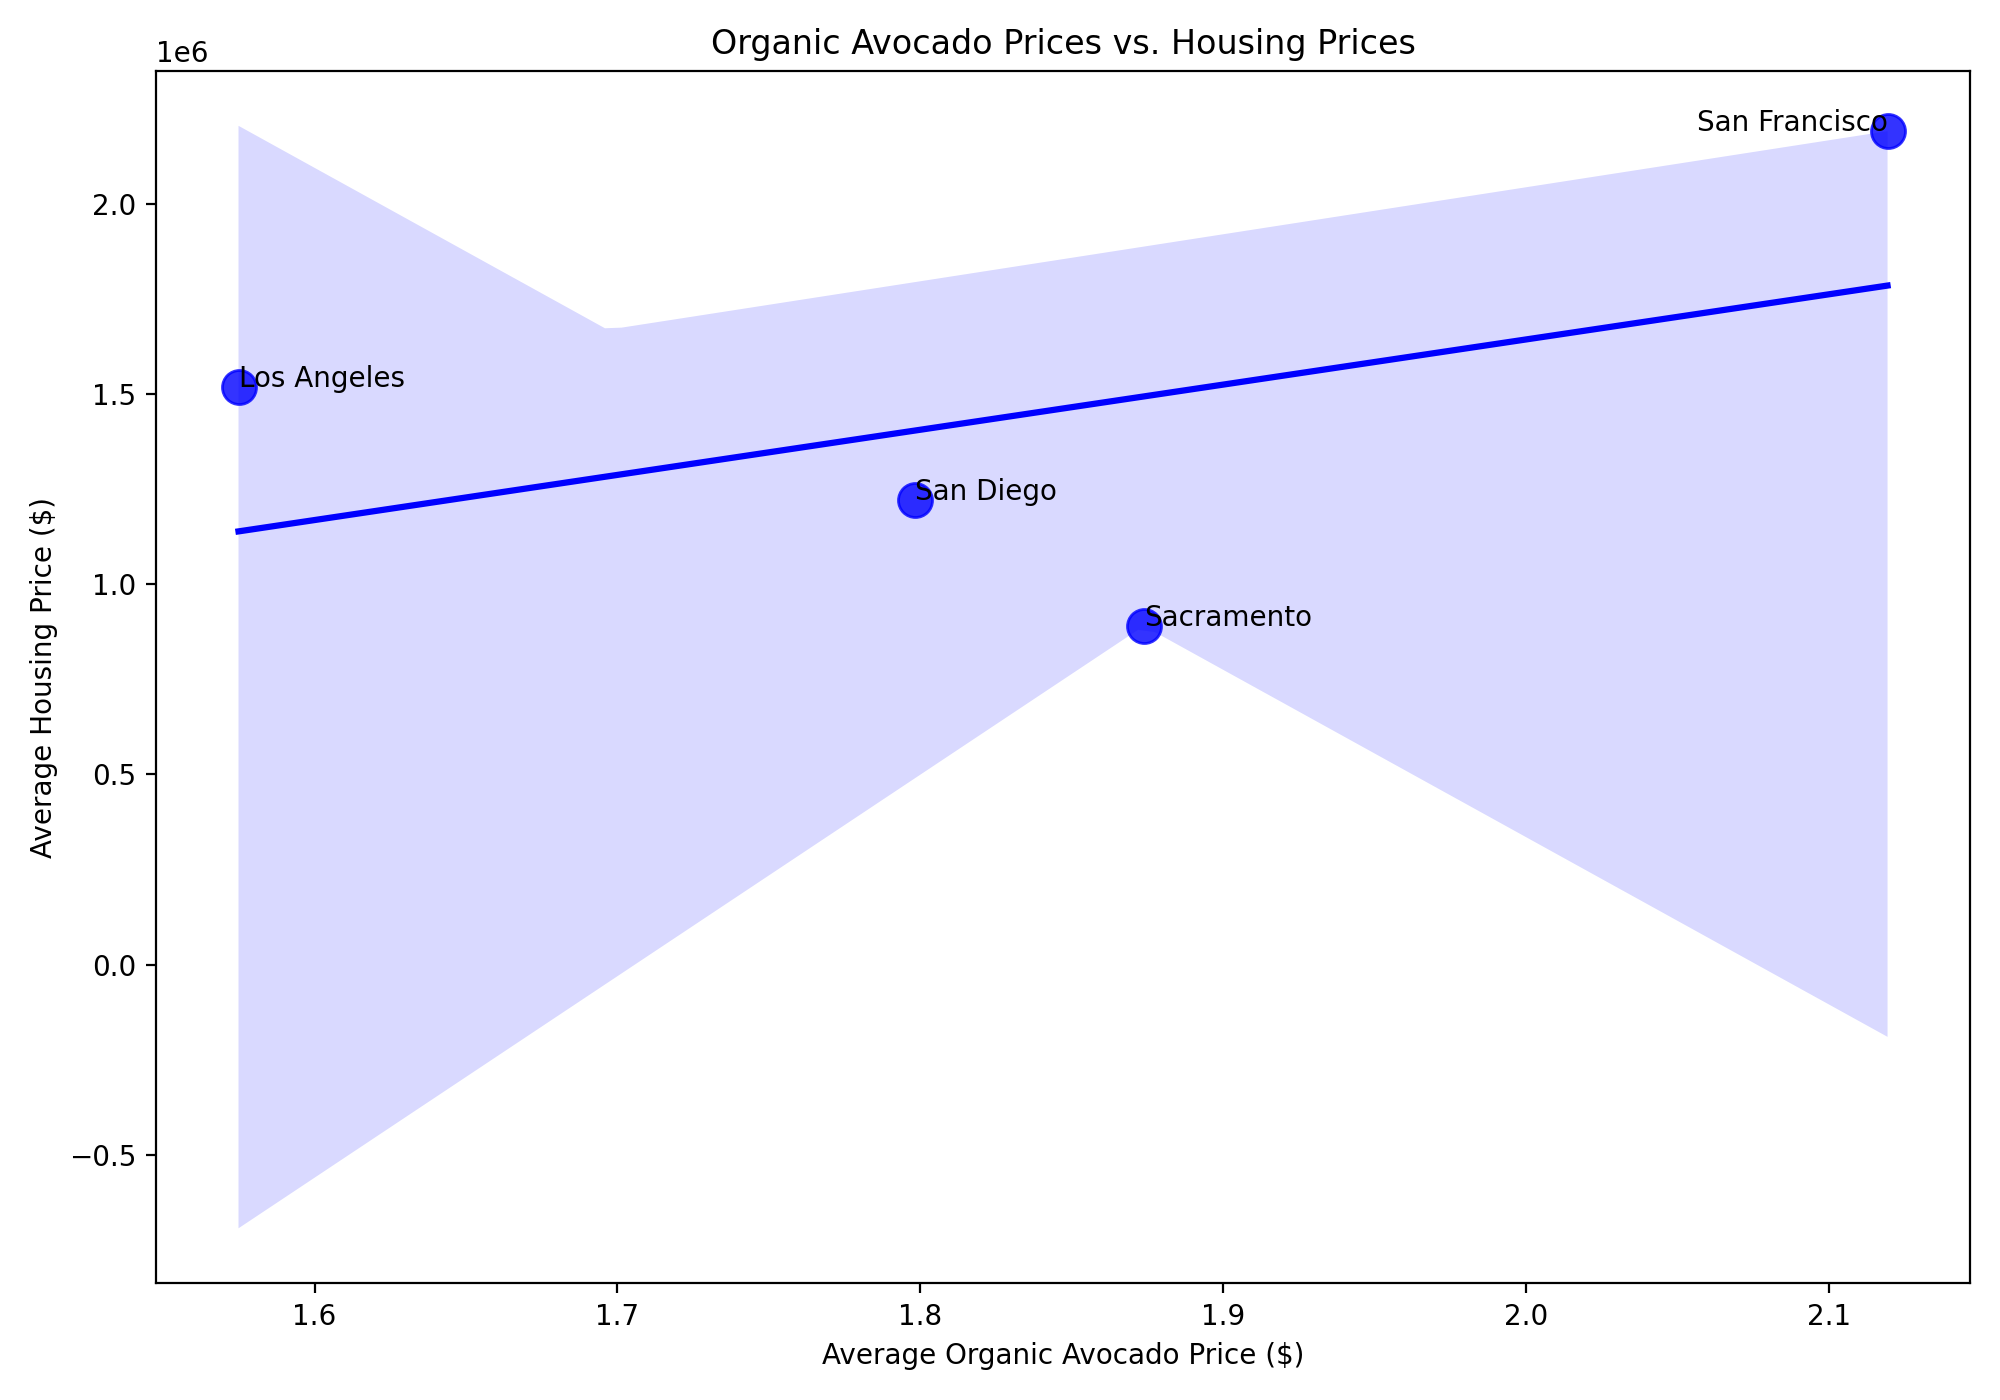

0.4814647318337239

In [18]:
#a regression line to visually assess correlation
plt.figure(figsize=(10, 7))
sns.regplot(x='average_price', y='mean_housing_price', data=organic_california_prices, scatter_kws={'s': 150}, color='blue')

#each point with the city name
for index, row in organic_california_prices.iterrows():
    plt.text(row['average_price'], row['mean_housing_price'], row['geography'], 
             horizontalalignment='right' if row['geography'] == 'San Francisco' else 'left')


plt.title('Organic Avocado Prices vs. Housing Prices')
plt.ylabel('Average Housing Price ($)')
plt.xlabel('Average Organic Avocado Price ($)')

plt.tight_layout()
plt.show()

#the correlation coefficient calculation
correlation_coefficient = organic_california_prices['average_price'].corr(organic_california_prices['mean_housing_price'])
correlation_coefficient



The calculated correlation coefficient is approximately 0.481. This indicates a moderate positive relationship between avocado prices and housing prices. In other words, cities with higher avocado prices tend to also have higher housing prices, and vice versa.

However, it's essential to note that correlation does not imply causation. While there's a positive correlation between the two variables, it doesn't necessarily mean that higher avocado prices cause higher housing prices or vice versa.

But maybe for SanFran the joke is somewhat accurate. 